In [33]:
import geopandas
import shapely
import seaborn
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time

geopd = geopandas.read_file("../dataset/example_dataset.geojson")

In [39]:
dates = map(lambda dateStr: datetime.strptime(dateStr, '%Y-%m-%d').date(), geopd['sowing_date'])
count = len(list(filter(lambda date: date.month != 4, dates)))
print(f'Field amount: {count}')

Field amount: 421


In [35]:
geopd['relative_error'] = abs((geopd['actual_yield'] - geopd['model_yield']) / geopd['actual_yield'])
geopd.head(5)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529


In [36]:
min_relative_error = geopd.sort_values(by='relative_error').iloc[0]
max_relative_error = geopd.sort_values(by='relative_error', ascending=False).iloc[0]

print('Field with minimum relative_error value:')
print(min_relative_error)
print('\nField with maximum relative_error value:')
print(max_relative_error)

Field with minimum relative_error value:
crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_VN_10_0702
avg_temperature                                            13.084752
avg_rainfall                                              633.554513
model_yield                                                   2603.0
geometry           MULTIPOLYGON (((28.697984661201634 49.34165148...
relative_error                                              0.001154
Name: 991, dtype: object

Field with maximum relative_error value:
crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08

In [37]:
geopd['centroid'] = geopd.apply(lambda row: f'POINT({row["geometry"].centroid.x}, {row["geometry"].centroid.y})', axis=1)
geopd.head(5)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,"POINT(28.163550050982856, 49.21292290278466)"
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,"POINT(28.159578591149135, 49.20347653068863)"
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,"POINT(27.299554944355855, 48.87374976936321)"
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556,"POINT(28.12310887255463, 49.20752409227187)"
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529,"POINT(28.854733538870974, 49.21875059008936)"


In [38]:
geopd['area_m2'] = geopd.area
geopd.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4740\3060543764.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geopd['area_m2'] = geopd.area


,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid,area_m2
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,"POINT(28.163550050982856, 49.21292290278466)",0.000039
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,"POINT(28.159578591149135, 49.20347653068863)",0.000265
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,"POINT(27.299554944355855, 48.87374976936321)",0.000027
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556,"POINT(28.12310887255463, 49.20752409227187)",0.000077
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529,"POINT(28.854733538870974, 49.21875059008936)",0.000148


In [52]:
color_dict = {}
for i, name in enumerate(geopd['crop_name'].unique()):
    color_dict[name] = plt.cm.Set1(i)

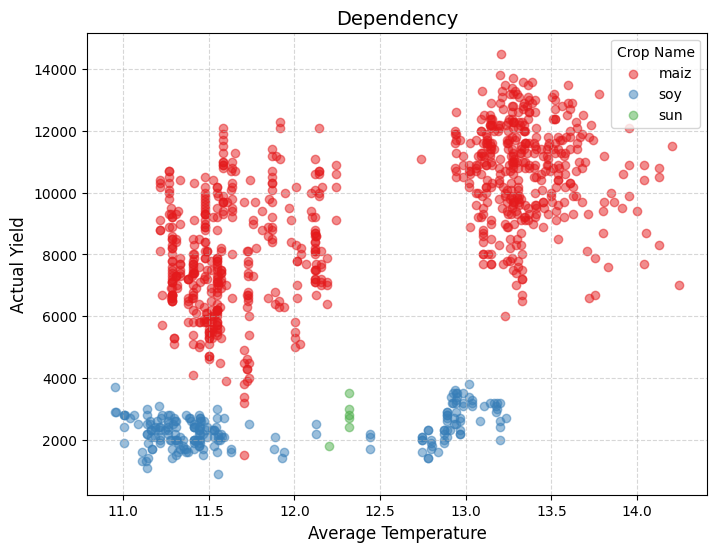

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
for crop_name in geopd['crop_name'].unique():
    crop_data = geopd[geopd['crop_name'] == crop_name]
    ax.scatter(x=crop_data['avg_temperature'], y=crop_data['actual_yield'], color=color_dict[crop_name], alpha=0.5, label=crop_name)

ax.set_xlabel('Average Temperature', fontsize=12)
ax.set_ylabel('Actual Yield', fontsize=12)
ax.set_title('Dependency', fontsize=14)
ax.grid(ls='--', alpha=0.5)
ax.legend(title='Crop Name')

plt.show()

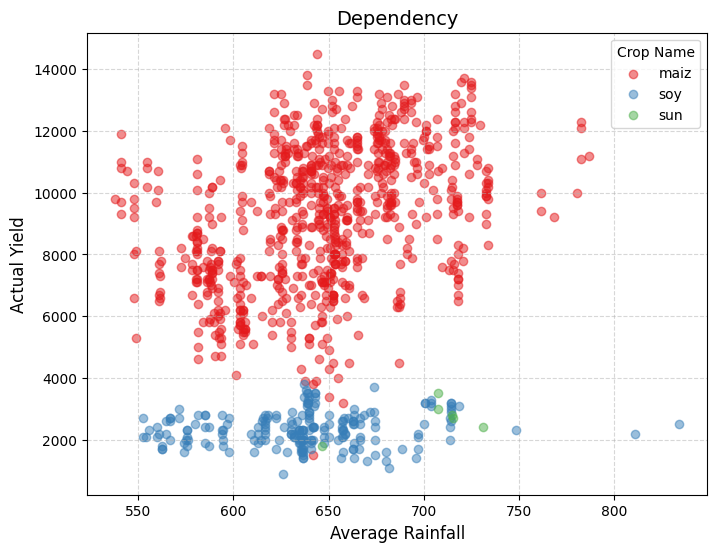

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
for crop_name in geopd['crop_name'].unique():
    crop_data = geopd[geopd['crop_name'] == crop_name]
    ax.scatter(x=crop_data['avg_rainfall'], y=crop_data['actual_yield'], color=color_dict[crop_name], alpha=0.5, label=crop_name)

ax.set_xlabel('Average Rainfall', fontsize=12)
ax.set_ylabel('Actual Yield', fontsize=12)
ax.set_title('Dependency', fontsize=14)
ax.grid(ls='--', alpha=0.5)
ax.legend(title='Crop Name')

plt.show()

In [57]:
geopd.to_file('../dataset/updated_dataset.geojson', driver='GeoJSON')